# Analyse du Dataset
L'objectif de cette partie est de préparer la base afin de simplifier le processus d'apprentissage et de s'assurer qu'aucune anomalie pouvant affecter ce dernier ne s'est glissée dans la base de données
 ## Pré-traitement / Lecture des données et labélisation

In [2]:
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
data_test_normal = Path('./data/test/NORMAL').glob('*.jpeg')
data_test_pneumo = Path('./data/test/PNEUMONIA').glob('*.jpeg')
data_val_normal = Path('./data/val/NORMAL').glob('*.jpeg')
data_val_pneumo = Path('./data/val/PNEUMONIA').glob('*.jpeg')
data_train_normal = Path('./data/train/NORMAL').glob('*.jpeg')
data_train_pneumo = Path('./data/train/PNEUMONIA').glob('*.jpeg')

In [4]:
test_data = []
for img in data_test_normal:
    test_data.append((img,0))
for img in data_test_pneumo:
    test_data.append((img,1))
    
val_data = []
for img in data_val_normal:
    val_data.append((img,0))
for img in data_val_pneumo:
    val_data.append((img,1))
    
train_data = []
for img in data_train_normal:
    train_data.append((img,0))
for img in data_train_pneumo:
    train_data.append((img,1))

# Vérifications
Interessons nous à la répartition du Dataset plus en détails
## Répartition Test/Train/Val

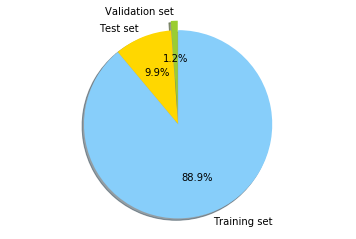

In [5]:
values = (len(test_data),len(train_data),len(val_data))
total = values[0] + values[1] + values[2]
sizes = [values[0]/total,values[1]/total,values[2]/2]
labels = 'Validation set', 'Test set', 'Training set'
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0.0, 0.0)
pt = plt.pie(sizes, labels=labels,explode = explode, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.savefig('./graphs/repart_set.png')

In [6]:
values

(624, 5216, 16)

On a donc une répartition en 90/10 entre la base d'entrainement (5216 images) et celle de test (624 images). On dispose également de 16 images de validation.

## Répartition dans les classes
On va s'interesser ici uniquement à la répartition des classes dans le Training set

In [7]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.to_pickle("./data_preprocess/train.pkl")

test_data = pd.DataFrame(test_data, columns=['image', 'label'],index=None)
test_data = test_data.sample(frac=1.).reset_index(drop=True)
test_data.to_pickle("./data_preprocess/test.pkl")

val_data = pd.DataFrame(val_data, columns=['image', 'label'],index=None)
val_data = val_data.sample(frac=1.).reset_index(drop=True)
val_data.to_pickle("./data_preprocess/val.pkl")

In [8]:
cases_count_train = train_data['label'].value_counts()

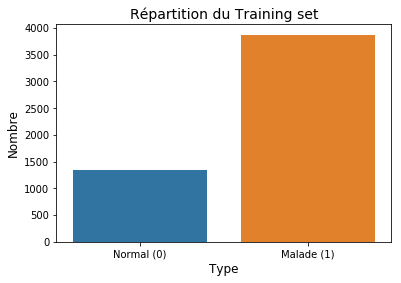

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=cases_count_train.index, y= cases_count_train.values)
plt.title('Répartition du Training set', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.xticks(range(len(cases_count_train.index)), ['Normal (0)', 'Malade (1)'])
plt.savefig('./graphs/repart_class.png')

Comme on le voit, les deux classes ne sont pas réparties de façon égale dans le Training set. Il faudra donc faire attention à ne pas tomber dans un "Accuracy Paradox".